# Data preprocess

In [2]:
import numpy as np
import re
import pandas as pd
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
files = open("/Users/babywalnut/Desktop/Ai_School_강의자료/김준태강사/par_corp.csv")

re_lines = []
for line in files:
    if line[0] == '[':
        continue
    re_line = re.sub('[#".?!\n]', '', line)
    re_lines.append(re_line)

kor = []
eng = []
count = 0
for line in re_lines:
    count = count + 1
    if count % 2 == 0:
        kor.append(line)
    else:
        eng.append(line)

d = {'kor':kor, 'eng':eng}
par_corp = pd.DataFrame(d)

print(d)

 a song', 'blow sboff to a supper', 'have sbdown for a few days', 'Will somebody please turn the light on', 'Can you do it,please ', 'Please bear with me until I finish my words', 'Would you have the kindnessto pull up the window', 'Put the light on,please', 'Reach down that book,please', 'Do me a favour', 'Could you help me to lift it,please', 'Will you do me a kindness', 'Would you oblige with a song', 'Will you be good enough to open the window', "Please don't go away until I come back", 'Would you please pass the salt', 'Give me a candid hearing', 'Can I interest you in a cup of coffee', 'Would you speak more slowly', 'Please try to come', 'Please put your cigarettes out', 'Go and stand over there,please', 'I will thank you to mind your own business', 'Please speak a little more slowly', 'Please peel me a peach ', 'Please remember me in your prayers', 'Do help me,please', 'Weigh it again please', 'I will thank you to leave me alone for a moment', 'Your alms are requested', 'Please 

In [1]:
encoder_input, decoder_input, decoder_output = [], [], []

# '나는 개와 산책을 하고 있다'
# ######## 위 문장의 셀 상태랑 은닉 상태 + <start> 가 인풋으로 들어가면
# '<start> i am taking a walk with my dog' -> 각 시점마다 이 문장의 일부분을 decoder_output을 추측하는데 사용하고 있음
# 'i am taking a walk with my dog <end>'

for stc in par_corp['kor']:
    encoder_input.append(stc.split())
    print(encoder_input)

# 스타트 뒤에 띄어쓰기 있습니다
for stc in par_corp['eng']:
    decoder_input.append(("<start> "+stc).split())

# 엔드 앞에 띄어쓰기 있습니다
for stc in par_corp['eng']:
    decoder_output.append((stc+" <end>").split())


NameError: name 'par_corp' is not defined

In [45]:
import pandas as pd
import numpy as np
import csv
import re
import soynlp
from soynlp.tokenizer import RegexTokenizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


files = open("/Users/babywalnut/Desktop/Ai_School_강의자료/김준태강사/pre_soccer.csv")

data = pd.read_csv('/Users/babywalnut/Desktop/Ai_School_강의자료/김준태강사/pre_soccer.csv')
df = pd.DataFrame(data)
df.columns=['title','article']
df
df_dop_row = df.dropna(axis=0)
df_dop_row
p = re.compile(r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)')
df_dop_row['text'] = [p.sub(' ', x) for x in df_dop_row['article'].tolist()]
p2 = re.compile(r'\([^)]*\)')
df_dop_row['text'] = [p2.sub('', x) for x in df_dop_row['text'].tolist()]
p3 = re.compile('[#=/,?!\"\'\t\r\n]')
df_dop_row['text'] = [p3.sub('', x) for x in df_dop_row['text'].tolist()]
p4 = re.compile(r'[.·()]')
df_dop_row['text'] = [p4.sub(' ', x) for x in df_dop_row['text'].tolist()]

# df_dop_row['text']
df_dop_row['text']


ab=[]
for line in range(len(df_dop_row)):
    if len(df_dop_row['text'][line])<=120:
        ab.append(line)

        
df_drop_row = df_dop_row.drop(ab)

df_sorted_by_index = df_drop_row.sort_index(ascending=True)
df_sorted_by_index.drop('article', axis=1)

,title,text
0,"황의조, '기분 좋은 기억' 낭트 상대로 득점 정조준",불과 1년 사이 위상이 달라졌다 빛의조 황의조 얘기다 프랑스 언론 레퀴프는 최근 ...
1,"PSG vs 뮌헨 '트레블' 결승...베켄바우어 ""어느 순간에는 운이 필요한 법""",김대식 기자 바이에른 뮌헨 전설 프란츠 베켄바우어가 이번 결승에선 우열을 가리기...
2,"무리뉴, “최근 PSG가 챔스 우승 못 한 것은 실패”(영상 인터뷰)",이명수 기자 토트넘의 무리뉴 감독이 파리 생제르망과 바이에른 뮌헨의 챔피언스리그...
3,"'발로 뛰는' 유벤투스, 선수 매각 위해 직접 영국으로 인력 파견",곽힘찬 기자 유벤투스가 올 여름 재정을 충당하기 위해 직접 영국으로 인력을 파...
4,"그리스 경찰 공식발표, “매과이어, 감옥 수감 중...경찰 폭행했다”",이명수 기자 그리스 경찰이 공식발표를 갖고 매과이어 폭행 사건을 설명했다 현재...
...,...,...
1924,"""내가 한국어 배우는 이유는 손흥민""…7개 언어 구사 도전 중인 무리뉴 감독",손흥민이 이끄는 잉글랜드 프로축구 1부리그 프리미어리그 소속 토트넘 홋스퍼 F...
1925,"숨길수 없는 첼시의 야망… ""그들은 4위권 아닌 우승이 목표""",공격적인 보강을 노리는 첼시의 목표가 뚜렷해졌다 영국 스카이스포츠는 27일 첼시가...
1926,메시의 계약파기는 가능할까? 변호사 “구단이 더 유리하다”,리오넬 메시는 과연 바르셀로나와 계약을 파기할 수 있을까 메시는 26일 바르셀로...
1927,"베컴의 인터 마이애미 등 MLS 구단들, 경기 전격 보이콧",데이비드 베컴의 인터 마이애미도 경기 보이콧 미국메이저리그사커 5경기가 선수들의 ...


In [2]:
encoder_input, decoder_input, decoder_output = [], [], []

# '나는 개와 산책을 하고 있다'
# ######## 위 문장의 셀 상태랑 은닉 상태 + <start> 가 인풋으로 들어가면
# '<start> i am taking a walk with my dog' -> 각 시점마다 이 문장의 일부분을 decoder_output을 추측하는데 사용하고 있음
# 'i am taking a walk with my dog <end>'

for stc in df_sorted_by_index['text']:
    encoder_input.append(stc.split())

# 스타트 뒤에 띄어쓰기 있습니다
for stc in df_sorted_by_index['title']:
    decoder_input.append(("<start> "+stc).split())

# 엔드 앞에 띄어쓰기 있습니다
for stc in df_sorted_by_index['title']:
    decoder_output.append((stc+" <end>").split())

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer_ko = Tokenizer()
tokenizer_ko.fit_on_texts(encoder_input)
encoder_input = tokenizer_ko.texts_to_sequences(encoder_input)
print(encoder_input)
# 만약에 5000이면, 1~4999(패딩하기 전) -> 0~4999(패딩하고 난 뒤)
tokenizer_en = Tokenizer()
tokenizer_en.fit_on_texts(decoder_input)
tokenizer_en.fit_on_texts(decoder_output)
decoder_input = tokenizer_en.texts_to_sequences(decoder_input)
decoder_output = tokenizer_en.texts_to_sequences(decoder_output)

2816, 857, 1, 1408, 91, 1709, 5, 2401, 471, 2436, 1408, 91, 1709, 18461, 16038, 15236, 59, 54873, 15707, 14151, 10680, 16471, 40, 54874, 1188, 2455, 8, 19428, 3459, 669, 615, 15008, 340, 1297, 8760, 20245, 4171, 2, 393, 81, 398, 54875, 119, 1408, 54876, 104, 103, 4849, 6834, 1758, 857, 1, 1149, 673, 1514, 54877, 110, 1408, 91, 2017, 2815, 387, 1155, 1, 350, 1758, 5903, 3434, 933, 1408, 4980, 7146, 262, 10749, 230, 20, 131, 26], [6754, 16535, 54878, 54879, 8630, 54880, 54881, 276, 3157, 24904, 548, 54882, 66, 33, 188, 54883, 105, 54884, 23840, 12215, 5292, 338, 969, 10, 188, 5782, 349, 46, 60, 7753, 54885, 19029, 24904, 188, 163, 15753, 34, 260, 316, 54886, 109, 54887, 60, 8819, 419, 3561, 15, 16890, 12982, 72, 60, 54888, 8760, 4507, 40, 340, 1575, 16647, 6754, 23897, 227, 3865, 1017, 75, 16890, 12982, 42, 756, 54889, 23390, 72, 2223, 8357, 414, 21756, 84, 15515, 54890, 12369, 364, 54891, 427, 1664, 3887, 2307, 84, 2396, 419, 54892, 3720, 1003, 404, 54893, 54894, 857, 54895, 54896, 2486

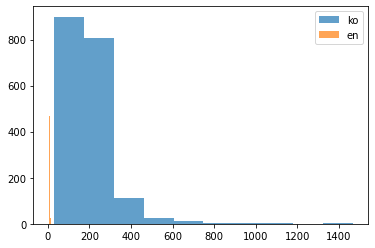

In [5]:
# 문장 길이 체크
import matplotlib.pyplot as plt

len_ko = []
for data in encoder_input:
    len_ko.append(len(data))

len_en = []
for data in decoder_input:
    len_en.append(len(data))

plt.hist(len_ko, label='ko', alpha=0.7)
plt.hist(len_en, label='en', alpha=0.7)
plt.legend()
plt.show()

In [6]:
# maxlen 없어도 알아서 잘 패딩합니다
encoder_input = pad_sequences(encoder_input, padding="post")
decoder_input = pad_sequences(decoder_input, padding="post")
decoder_output = pad_sequences(decoder_output, padding="post")

In [7]:
print(encoder_input.shape)
print(decoder_input.shape)

(1868, 1467)
(1868, 15)


In [8]:
# 나중에 prediction 할때 사용하기 위함 (인덱스로 단어 찾기)
en_to_index = tokenizer_en.word_index
index_to_en = tokenizer_en.index_word
print(en_to_index)

6476, '결별선언]': 6477, '‘유벤투스도': 6478, '영입설’': 6479, '환상의': 6480, '투톱': 6481, '결성할까': 6482, '[라리가': 6483, '유출된': 6484, "'내부": 6485, "문서',": 6486, '떠나려는': 6487, '담은': 6488, '떠난다...구단': 6489, "뛴'": 6490, '베일...긱스': 6491, '경고': 6492, '감옥행': 6493, "'해-달-진실은": 6494, '오래': 6495, '감출': 6496, "'폭행·뇌물": 6497, '3년...맨유는': 6498, "'지지+자체조사'": 6499, '"너': 6500, '게을러"': 6501, '알리와': 6502, '만남부터': 6503, '충고…알리도': 6504, '수긍': 6505, '루메니게': 6506, '"리버풀,': 6507, '‘한': 6508, '더’': 6509, '39세': 6510, '[fft.wiki]': 6511, '알렉산더-아놀드가': 6512, '혁명': 6513, "1400억!'": 6514, '첼시와': 6515, "'런던행'": 6516, '1명': 6517, '추가': 6518, '“넌': 6519, '헌신해라”': 6520, '분노하게': 6521, '지지"…수아레스는': 6522, "'박수'": 6523, '‘msn': 6524, '트리오’': 6525, '재결성': 6526, '할까?': 6527, '모락모락': 6528, '밑으로?…에버턴': 6529, '"뭘': 6530, '귀티나네"': 6531, '블랙': 6532, '정장': 6533, '포스': 6534, '것"…예상': 6535, '1500억': 6536, '떠나면,': 6537, '쿠티뉴가': 6538, '부활할': 6539, '있을까': 6540, '쓰러져…': 6541, '"심장제세동기': 6542, "'무리수'": 6543, '속출…': 6544, '"중국': 6545, '올래?"': 6546, '"풀

In [9]:
test_size = 200
encoder_input_train = encoder_input[:-test_size]
decoder_input_train = decoder_input[:-test_size]
decoder_output_train = decoder_output[:-test_size]

encoder_input_test = encoder_input[-test_size:]
decoder_input_test = decoder_input[-test_size:]
decoder_output_test = decoder_output[-test_size:]

# Training

In [14]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking
from tensorflow.keras.models import Model

In [15]:
# 인코더 - 한글 문장 받아서 LSTM 마지막 시점의 은닉상태/셀상태 리턴하도록
# 원래는 데이터 갯수랑 문장 길이 같이 들어가야함
# 왜 데이터 갯수는 명시하지 않을까요?
# fit 할때 validation data -> test set -> 데이터 갯수 다르기 때문에
encoder_inputs = Input(shape=(1467,)) #27은 문장의 길이
# +1을 해서 패딩까지 고려
encoder_embed = Embedding(len(tokenizer_ko.word_index)+1, 50)(encoder_inputs)
# 패딩 값은 필요없는데... (0에 해당하는 임베딩 벡터 제외)
encoder_mask = Masking(mask_value=0)(encoder_embed)
# return state를 쓰면 마지막 은닉 상태, 마지막 은닉 상태, 마지막 셀 상태 값을 리턴
encoder_outputs, h_state, c_state = LSTM(50, return_state=True)(encoder_mask)

In [16]:
# 디코더 - 위에서 리턴한 상태값이랑, 영어 문장 입력받아서 LSTM의 출력값 리턴하도록
decoder_inputs = Input(shape=(15,))
decoder_embed = Embedding(len(tokenizer_en.word_index)+1, 50)(decoder_inputs)
decoder_mask = Masking(mask_value=0)(decoder_embed)
# return sequences를 쓰면 전체 시점의 은닉 상태 값을 리턴
# 둘 다 쓰면 전체 시점의 은닉 상태(단어갯수만큼)/마지막 은닉 상태/마지막 셀 상태 값을 리턴
decoder_lstm = LSTM(50, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_mask, initial_state=[h_state, c_state])
decoder_dense = Dense(len(tokenizer_en.word_index)+1, activation='softmax')
decoder_softmax_outputs = decoder_dense(decoder_outputs)

In [17]:
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
# sparse는 라벨이 정수 형태로 제공될 때 사용되는 함수 (그냥 categorical은 원핫 벡터로 라벨이 제공될 때)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
# 레이어 별로 가중치가 학습되는 것임
model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_output_train, validation_data = ([encoder_input_test, decoder_input_test], decoder_output_test), batch_size = 128, epochs = 50)

Epoch 1/50
14/14 [==============================] - 21s 1s/step - loss: 8.6181 - acc: 0.3665 - val_loss: 7.9050 - val_acc: 0.4183
Epoch 2/50
14/14 [==============================] - 19s 1s/step - loss: 7.4680 - acc: 0.3988 - val_loss: 7.1421 - val_acc: 0.4183
Epoch 3/50
14/14 [==============================] - 19s 1s/step - loss: 6.7463 - acc: 0.3985 - val_loss: 6.5949 - val_acc: 0.4183
Epoch 4/50
14/14 [==============================] - 19s 1s/step - loss: 6.1917 - acc: 0.3985 - val_loss: 6.1499 - val_acc: 0.4183
Epoch 5/50
14/14 [==============================] - 21s 2s/step - loss: 5.7425 - acc: 0.3985 - val_loss: 5.7953 - val_acc: 0.4183
Epoch 6/50
14/14 [==============================] - 23s 2s/step - loss: 5.3986 - acc: 0.3985 - val_loss: 5.5834 - val_acc: 0.4183
Epoch 7/50
14/14 [==============================] - 20s 1s/step - loss: 5.1595 - acc: 0.3985 - val_loss: 5.4302 - val_acc: 0.4183
Epoch 8/50
14/14 [==============================] - 19s 1s/step - loss: 5.0043 - acc: 0.39